<a href="https://colab.research.google.com/github/afadlih/E2E-MagangIn/blob/main/Week10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#D. Tugas Praktikum

- Nama  : Ahmad Fadlih Wahyu Sardana
- NIM   : 2341720069
- Kelas : TI-3F
- No    : 03

# 1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Import Library

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Library berhasil diimpor.


#3. Fungsi dilasi serta  hasil dilasi pada citra dengan Structuring Element


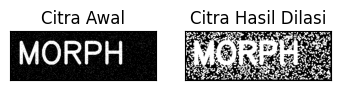

In [ ]:
#Dilasi tanpa library
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
img_d= cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_03/Images/noisy_text.png',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

#4. Program implementasi operasi dilasi Structuring Element Dilasi (SED)berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

[[1 1 1]
 [1 1 1]
 [1 1 1]]


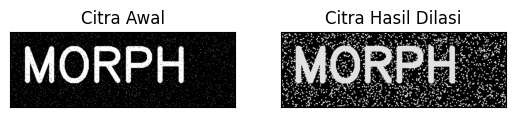

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_03/Images/noisy_text.png')
#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()


#5. Fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring ElementErosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

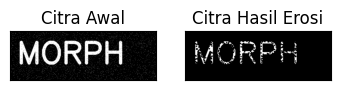

In [ ]:
#Erosi Tanpa Library
def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE
img_e= cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_03/Images/noisy_text.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 175, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

#6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuksquare 5 x 5 dengan menggunakan library morphology dari openCV

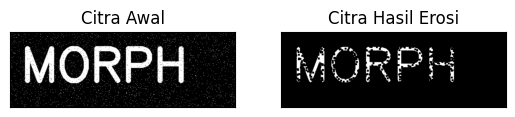

In [ ]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_03/Images/noisy_text.png')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

#7. Buatlah program implementasi operasi opening dengan Structuring Elementberbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dariOperasi Opening Menggunakan tanpa Library Morphology

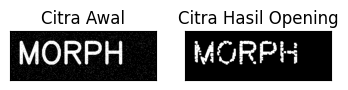

In [ ]:
img_o= cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_03/Images/noisy_text.png',0) #
reto, thresho = cv2.threshold(img_o, 127, 225,
cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho,k),k)
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

Operasi Opening Menggunakan Library Morphology


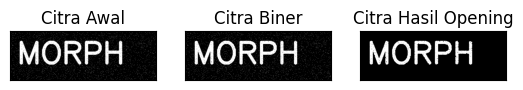

In [ ]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_03/Images/noisy_text.png',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()


#8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuksquare 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV
operasi closing tanpa library morphology

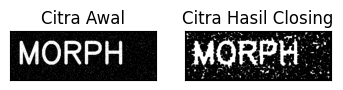

In [ ]:
img_c= cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_03/Images/noisy_text.png',0) #
retc, threshc = cv2.threshold(img_c, 127, 225,
cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)
plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

operasi closing dengan library morphology


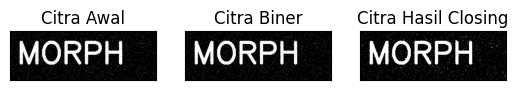

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_03/Images/noisy_text.png',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()